In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn import preprocessing
from lazypredict.Supervised import LazyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import string

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelSpreading

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df_lyrics = pd.read_csv("/content/soy_lyrics_features.csv")
df_bb = pd.read_csv("/content/soy_billboard_features.csv")
df_spotify = pd.read_csv("/content/soy_spotify.csv")
df_spotify = df_spotify[df_spotify.time_signature != 111]

In [ ]:
print("Len of spotify data = ", len(df_spotify))
print("Len of billboard data = ", len(df_bb))
print("Len of lyrics data = ", len(df_lyrics))

Len of spotify data =  239
Len of billboard data =  251
Len of lyrics data =  242


In [ ]:
list1 = list(df_spotify["song"])
list2 = list(df_bb["song"])
list3 = list(df_lyrics["song"])

In [ ]:
list11 = list(df_spotify["artist"])
list22 = list(df_bb["artist"])
list33 = list(df_lyrics["artist"])

list11 = [s.lstrip() for s in list11]
list22 = [s.lstrip() for s in list22]
list33 = [s.lstrip() for s in list33]

list11 = [s.split()[0] for s in list11]
list22 = [s.split()[0] for s in list22]
list33 = [s.split()[0] for s in list33]

key1 = [list1[i] + list11[i] for i in range(len(list1))]
key2 = [list2[i] + list22[i] for i in range(len(list2))]
key3 = [list3[i] + list33[i] for i in range(len(list3))]

key1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in key1]
key2 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in key2]
key3 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in key3]

In [ ]:
df_bb["song_key"] = key2
df_spotify["song_key"] = key1
df_lyrics["song_key"] = key3

In [ ]:
# Merge the dataframes on the common column 'song_key'
merged_df = pd.merge(df_bb, df_spotify, on='song_key', how='inner')
merged_df = pd.merge(merged_df, df_lyrics, on='song_key', how='inner')

# Only keep rows that have information from all 3 dataframes
result_df = merged_df.dropna()

In [ ]:
result_df = result_df[['year_x', 'song_x', 'artist_x',
       'wasWinner_x', 'weeks_in_top_25', 'weeks_in_top_10', 'weeks_on_chart',
       'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy',
       'pos_sen', 'neg_sen', 'happy', 'fear', 'anger', 'sad', 'surprise',
       'profanity']]

In [ ]:
# Remove duplicate rows based on all columns
result_df = result_df.reset_index(drop=True).drop_duplicates()

In [ ]:
print("Len of combined data = ", len(result_df))

Len of combined data =  238


In [ ]:
# Remove duplicate rows based on all columns
result_df = result_df.reset_index(drop=True).drop_duplicates(subset=['weeks_in_top_25', 'weeks_in_top_10', 'weeks_on_chart',
       'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy',
       'pos_sen', 'neg_sen', 'happy', 'fear', 'anger', 'sad', 'surprise',
       'profanity'])

In [ ]:
result_df

,year_x,song_x,artist_x,wasWinner_x,weeks_in_top_25,weeks_in_top_10,weeks_on_chart,peak_position,average_position,danceability,...,num_words,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity
0,1980,What a Fool Believes,The Doobie Brothers,yes,12,9,20,1,28.25,0.76,...,279,0.39,0.21,0.07,0.17,0.24,0.24,0.26,0.10,0.30
1,1980,She Believes in Me,Kenny Rogers,no,11,7,16,5,23.44,0.32,...,286,0.41,0.16,0.07,0.08,0.12,0.04,0.24,0.52,0.05
2,1980,Reunited,Peaches & Herb,no,13,10,23,1,33.30,0.56,...,390,0.37,0.23,0.07,0.23,0.13,0.08,0.26,0.31,0.42
3,1980,I Will Survive,Gloria Gaynor,no,16,13,27,1,33.93,0.78,...,650,0.24,0.15,0.17,0.27,0.26,0.08,0.23,0.15,0.34
4,1980,Honesty,Billy Joel,no,2,0,11,24,50.73,0.55,...,225,0.47,0.22,0.13,0.18,0.09,0.27,0.41,0.05,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,2023,All Too Well (10 Minute Version),Taylor Swift,no,3,2,15,1,60.20,0.63,...,981,0.34,0.15,0.08,0.19,0.15,0.11,0.31,0.23,0.22
234,2023,As It Was,Harry Styles,no,25,25,25,1,1.44,0.52,...,253,0.40,0.07,0.02,0.12,0.29,0.06,0.35,0.18,0.21
235,2023,Bad Habit,Steve Lacy,no,10,8,12,2,17.08,0.69,...,446,0.32,0.18,0.09,0.07,0.17,0.04,0.33,0.39,0.25
236,2023,The-Dream,Beyoncé,no,0,0,0,150,150.00,0.43,...,683,0.25,0.16,0.05,0.06,0.19,0.07,0.14,0.54,0.59


In [ ]:
result_df.to_csv("soy_combined_not_full.csv")

In [ ]:
# Splitting into features and target

feature_list = ['weeks_in_top_25', 'weeks_in_top_10', 'weeks_on_chart',
       'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy',
       'pos_sen', 'neg_sen', 'happy', 'fear', 'anger', 'sad', 'surprise',
       'profanity']

result_df['class'] = result_df['wasWinner_x'].replace({'yes': 1, 'no': 0})

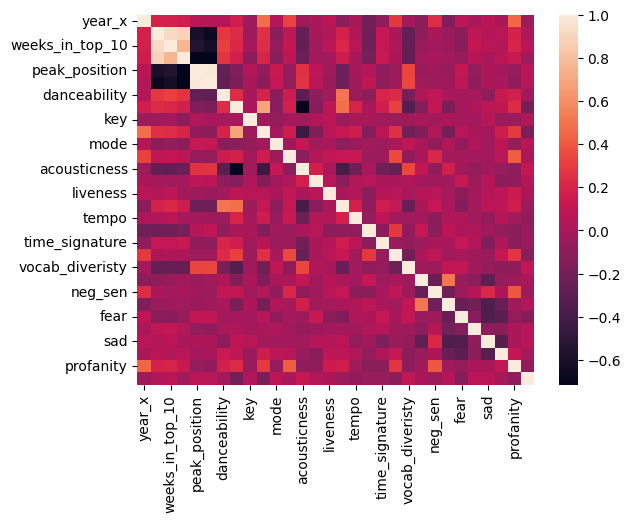

<Figure size 1500x1500 with 0 Axes>

In [ ]:
sns.heatmap(result_df.corr())
plt.figure(figsize=(15, 15))
plt.show()

In [ ]:
feature_variance = {}
for feature in feature_list:
    values = np.array(result_df[feature])
    x_norm = (values-np.min(values))/(np.max(values)-np.min(values))
    var = np.var(x_norm)
    #print("Variance for", feature, "=", var)
    feature_variance[feature] = var

In [ ]:
sorted_variance = sorted(feature_variance.items(), key=lambda x:x[1])
features_sorted = []
for var in sorted_variance:
  print(var)
  features_sorted.append(var[0])

('num_words', 0.008054797742700846)
('instrumentalness', 0.00907722711275613)
('time_signature', 0.010062848668879317)
('duration_ms', 0.011699995673373114)
('loudness', 0.012883006391095703)
('neg_sen', 0.022180189580127824)
('speechiness', 0.023482753347487846)
('sad', 0.026106265447355413)
('anger', 0.02623298492735068)
('vocab_diveristy', 0.028391531489044563)
('liveness', 0.03070725359575327)
('pos_sen', 0.03286758590077732)
('weeks_in_top_25', 0.0371781384846779)
('danceability', 0.03822622393454316)
('surprise', 0.03851007697196526)
('tempo', 0.03994514352024427)
('energy', 0.041844120909865536)
('weeks_in_top_10', 0.04444392135939344)
('fear', 0.045684479143069764)
('happy', 0.04778095678020644)
('weeks_on_chart', 0.055309429281314014)
('valence', 0.0649401383394036)
('profanity', 0.07630587849828345)
('acousticness', 0.0833628772892732)
('key', 0.10103015440498027)
('average_position', 0.10451088487464842)
('peak_position', 0.13469841207003208)
('mode', 0.1864451663018148)


In [ ]:
(result_df.corr().unstack().sort_values().drop_duplicates())[0:15]

weeks_on_chart    peak_position      -0.71
average_position  weeks_on_chart     -0.71
acousticness      energy             -0.69
weeks_in_top_25   average_position   -0.66
average_position  weeks_in_top_10    -0.63
weeks_in_top_25   peak_position      -0.61
peak_position     weeks_in_top_10    -0.55
loudness          acousticness       -0.44
valence           acousticness       -0.39
happy             sad                -0.35
sad               fear               -0.35
vocab_diveristy   energy             -0.33
sad               surprise           -0.32
surprise          fear               -0.31
danceability      acousticness       -0.30
dtype: float64

In [ ]:
(result_df.corr().unstack().sort_values().drop_duplicates())[-15:]

average_position  vocab_diveristy   0.34
num_words         speechiness       0.35
profanity         neg_sen           0.40
speechiness       profanity         0.41
profanity         year_x            0.45
year_x            loudness          0.47
valence           energy            0.48
danceability      valence           0.50
pos_sen           happy             0.51
loudness          energy            0.69
weeks_on_chart    weeks_in_top_10   0.76
weeks_in_top_25   weeks_on_chart    0.89
                  weeks_in_top_10   0.92
average_position  peak_position     0.98
year_x            year_x            1.00
dtype: float64

Dropping - peak position, weeks in top 10, weeks in top 25, energy, num words, instrumentalness, time signature, duration

In [ ]:
features_sorted

['num_words',
 'instrumentalness',
 'time_signature',
 'duration_ms',
 'loudness',
 'neg_sen',
 'speechiness',
 'sad',
 'anger',
 'vocab_diveristy',
 'liveness',
 'pos_sen',
 'weeks_in_top_25',
 'danceability',
 'surprise',
 'tempo',
 'energy',
 'weeks_in_top_10',
 'fear',
 'happy',
 'weeks_on_chart',
 'valence',
 'profanity',
 'acousticness',
 'key',
 'average_position',
 'peak_position',
 'mode']

In [ ]:
features_subset = ['anger', 'vocab_diveristy', 'liveness', 'pos_sen', 
                   'danceability', 'surprise', 'tempo', 'fear', 'happy', 'weeks_on_chart', 'valence', 'profanity', 
                   'acousticness', 'key', 'average_position', 'mode']

In [ ]:
len(features_subset)

16

In [ ]:
def lazy_predict(result_df, feature_list, norm=False, print=False):
  X = result_df[feature_list]
  y = result_df["class"]

  if norm == True:
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns)

  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

  clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
  models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  if print == True:
    print(models)
  return models

In [ ]:
models = lazy_predict(result_df, features_subset, norm=True)

100%|██████████| 29/29 [00:01<00:00, 28.10it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.81,0.61,0.61,0.78,0.01
LGBMClassifier,0.83,0.57,0.57,0.78,0.04
KNeighborsClassifier,0.83,0.57,0.57,0.78,0.01
ExtraTreeClassifier,0.72,0.56,0.56,0.72,0.01
LabelPropagation,0.81,0.55,0.55,0.76,0.02
LabelSpreading,0.81,0.55,0.55,0.76,0.02
LinearDiscriminantAnalysis,0.81,0.50,0.50,0.72,0.02
SVC,0.81,0.50,0.50,0.72,0.02
RidgeClassifierCV,0.81,0.50,0.50,0.72,0.01


In [ ]:
def evaluate_three_years(clf, result_df, feature_list, starting_year, norm=False):

  if norm == True:
    # Select only the numeric columns for scaling
    num_cols = result_df.select_dtypes(include=['float', 'int']).drop(columns=['year_x', 'class']).columns
    scaler = MinMaxScaler()
    scaler.fit(result_df[num_cols])
    result_df[num_cols] = scaler.transform(result_df[num_cols])

  df_train = result_df[(result_df['year_x'] >= starting_year) & (result_df['year_x'] <= 2020)]
  df_2021 = result_df[(result_df['year_x'] == 2021)]
  df_2022 = result_df[(result_df['year_x'] == 2022)]
  df_2023 = result_df[(result_df['year_x'] == 2023)]

  X_train = df_train[feature_list]
  y_train = df_train["class"]


  X_2021 = df_2021[feature_list]
  y_2021 = df_2021["class"]

  X_2022 = df_2022[feature_list]
  y_2022 = df_2022["class"]

  X_2023 = df_2023[feature_list]
  y_2023 = df_2023["class"]

  clf.fit(X_train, y_train)

  overall_preds = []
  actuals = []


  print("2021 PREDICTIONS")

  proba = clf.predict_proba(X_2021)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2021.iloc[ind]["song_x"])
      overall_preds.append(df_2021.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2021.loc[df_2021['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2022 PREDICTIONS")

  proba = clf.predict_proba(X_2022)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2022.iloc[ind]["song_x"])
      overall_preds.append(df_2022.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2022.loc[df_2022['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2023 PREDICTIONS")

  proba = clf.predict_proba(X_2023)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2023.iloc[ind]["song_x"])
      overall_preds.append(df_2023.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2023.loc[df_2023['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])


  correct = 0
  for song in actuals:
    if song in overall_preds:
      correct += 1

  print("")
  print("Got", correct, "correct")
  print("")

In [ ]:
clf = KNeighborsClassifier()

In [ ]:
evaluate_three_years(clf, result_df, features_subset, 1980, norm=True)

2021 PREDICTIONS
Top 3 predictions:
The Box
If the World Was Ending
Everything I Wanted

Actual winner: 
I Can't Breathe

------------------------
2022 PREDICTIONS
Top 3 predictions:
Leave the Door Open
Kiss Me More
Fight for You

Actual winner: 
Leave the Door Open

------------------------
2023 PREDICTIONS
Top 3 predictions:
Bad Habit
God Did
Just Like That

Actual winner: 
Just Like That

Got 2 correct



In [ ]:
result_df.to_csv("soy_not_full_combined.csv")

Adding Search Trends Data

In [ ]:
df_trends = pd.read_csv("/content/song_oy_search_trends.csv").drop(columns=["Unnamed: 0"])

In [ ]:
list1 = list(result_df["song_x"])
list2 = list(df_trends["song"])

In [ ]:
key1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list1]
key2 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list2]

In [ ]:
df_trends["song_key"] = key2
result_df["song_key"] = key1

In [ ]:
# Merge the dataframes on the common column 'song_key'
combined_df = pd.merge(df_trends, result_df, on='song_key', how='inner')

In [ ]:
len(combined_df)

110

In [ ]:
features_list = ['peak pop', 'avg pop', 'song_key', 'weeks_in_top_25', 'weeks_in_top_10',
       'weeks_on_chart', 'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy', 'pos_sen', 'neg_sen',
       'happy', 'fear', 'anger', 'sad', 'surprise', 'profanity', 'class']

In [ ]:
feature_variance = {}
for feature in feature_list:
    values = np.array(result_df[feature])
    x_norm = (values-np.min(values))/(np.max(values)-np.min(values))
    var = np.var(x_norm)
    #print("Variance for", feature, "=", var)
    feature_variance[feature] = var

In [ ]:
sorted_variance = sorted(feature_variance.items(), key=lambda x:x[1])
features_sorted = []
for var in sorted_variance:
  print(var)
  features_sorted.append(var[0])

('num_words', 0.008054797742700846)
('instrumentalness', 0.00907722711275613)
('time_signature', 0.010062848668879317)
('duration_ms', 0.011699995673373114)
('loudness', 0.012883006391095703)
('neg_sen', 0.022180189580127824)
('speechiness', 0.023482753347487846)
('sad', 0.026106265447355413)
('anger', 0.02623298492735068)
('vocab_diveristy', 0.028391531489044563)
('liveness', 0.03070725359575327)
('pos_sen', 0.03286758590077732)
('weeks_in_top_25', 0.0371781384846779)
('danceability', 0.03822622393454316)
('surprise', 0.03851007697196526)
('tempo', 0.03994514352024427)
('energy', 0.041844120909865536)
('weeks_in_top_10', 0.04444392135939344)
('fear', 0.045684479143069764)
('happy', 0.04778095678020644)
('weeks_on_chart', 0.055309429281314014)
('valence', 0.0649401383394036)
('profanity', 0.07630587849828345)
('acousticness', 0.0833628772892732)
('key', 0.10103015440498027)
('average_position', 0.10451088487464842)
('peak_position', 0.13469841207003208)
('mode', 0.1864451663018148)


In [ ]:
(combined_df.corr().unstack().sort_values().drop_duplicates())[0:15]

weeks_on_chart   average_position   -0.72
acousticness     energy             -0.72
weeks_on_chart   peak_position      -0.72
weeks_in_top_25  average_position   -0.69
weeks_in_top_10  average_position   -0.65
peak_position    weeks_in_top_25    -0.61
weeks_in_top_10  peak_position      -0.56
loudness         acousticness       -0.55
sad              happy              -0.43
valence          acousticness       -0.42
energy           vocab_diveristy    -0.39
duration_ms      time_signature     -0.39
valence          vocab_diveristy    -0.37
fear             surprise           -0.37
valence          average_position   -0.36
dtype: float64

In [ ]:
(combined_df.corr().unstack().sort_values().drop_duplicates())[-15:]

danceability      weeks_in_top_10   0.40
happy             pos_sen           0.40
vocab_diveristy   acousticness      0.42
average_position  vocab_diveristy   0.44
vocab_diveristy   peak_position     0.44
energy            valence           0.50
valence           danceability      0.50
energy            loudness          0.73
weeks_in_top_10   weeks_on_chart    0.74
avg pop           peak pop          0.78
year              year_x            0.88
weeks_on_chart    weeks_in_top_25   0.89
weeks_in_top_25   weeks_in_top_10   0.91
average_position  peak_position     0.98
year              year              1.00
dtype: float64

In [ ]:
combined_df.describe()

,year,peak pop,avg pop,year_x,weeks_in_top_25,weeks_in_top_10,weeks_on_chart,peak_position,average_position,danceability,...,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity,class
count,110.00,110.00,110.00,110.00,110.00,110.00,110.00,110.00,110.00,110.00,...,110.00,110.00,110.00,110.00,110.00,110.00,110.00,110.00,110.00,110.00
mean,2015.01,42.06,15.54,2014.72,13.30,8.87,20.72,31.97,47.42,0.60,...,0.35,0.16,0.11,0.15,0.25,0.08,0.30,0.22,0.42,0.17
std,5.67,37.94,17.42,6.35,12.26,9.27,14.11,52.22,47.05,0.15,...,0.08,0.09,0.07,0.13,0.13,0.08,0.15,0.14,0.30,0.38
min,2005.00,0.00,0.00,1985.00,0.00,0.00,0.00,1.00,1.44,0.21,...,0.19,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00
25%,2010.00,10.00,3.42,2010.00,0.00,0.00,8.25,1.00,15.60,0.52,...,0.30,0.10,0.06,0.06,0.16,0.03,0.20,0.12,0.19,0.00
50%,2016.00,25.00,9.48,2015.50,12.50,5.00,22.50,4.00,25.77,0.61,...,0.35,0.14,0.09,0.12,0.24,0.06,0.27,0.20,0.34,0.00
75%,2020.00,84.75,20.61,2020.00,24.00,16.00,30.75,29.75,56.60,0.70,...,0.40,0.20,0.14,0.22,0.35,0.11,0.38,0.30,0.66,0.00
max,2023.00,100.00,82.83,2023.00,53.00,36.00,53.00,150.00,150.00,0.90,...,0.65,0.48,0.44,0.65,0.67,0.52,0.81,0.75,1.00,1.00


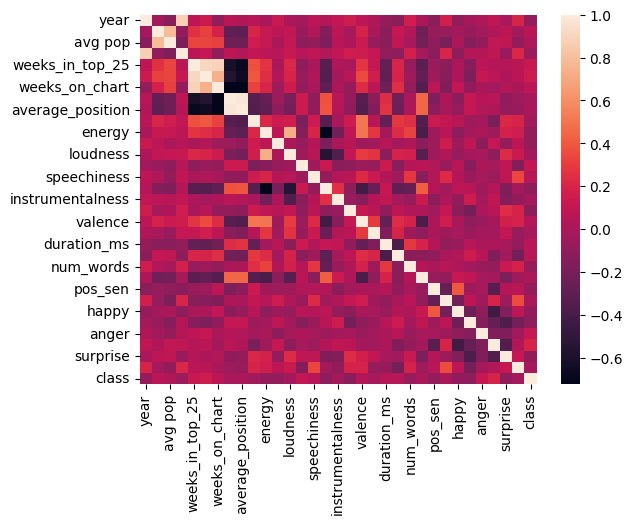

<Figure size 1500x1500 with 0 Axes>

In [ ]:
sns.heatmap(combined_df.corr())
plt.figure(figsize=(15, 15))
plt.show()

In [ ]:
(combined_df.corr().unstack().sort_values().drop_duplicates())[0:15]

weeks_on_chart   average_position   -0.72
acousticness     energy             -0.72
weeks_on_chart   peak_position      -0.72
weeks_in_top_25  average_position   -0.69
weeks_in_top_10  average_position   -0.65
peak_position    weeks_in_top_25    -0.61
weeks_in_top_10  peak_position      -0.56
loudness         acousticness       -0.55
sad              happy              -0.43
valence          acousticness       -0.42
energy           vocab_diveristy    -0.39
duration_ms      time_signature     -0.39
valence          vocab_diveristy    -0.37
fear             surprise           -0.37
valence          average_position   -0.36
dtype: float64

In [ ]:
(combined_df.corr().unstack().sort_values().drop_duplicates())[-15:]

danceability      weeks_in_top_10   0.40
happy             pos_sen           0.40
vocab_diveristy   acousticness      0.42
average_position  vocab_diveristy   0.44
vocab_diveristy   peak_position     0.44
energy            valence           0.50
valence           danceability      0.50
energy            loudness          0.73
weeks_in_top_10   weeks_on_chart    0.74
avg pop           peak pop          0.78
year              year_x            0.88
weeks_on_chart    weeks_in_top_25   0.89
weeks_in_top_25   weeks_in_top_10   0.91
average_position  peak_position     0.98
year              year              1.00
dtype: float64

In [ ]:
feature_subset = [
    'duration_ms',
  'neg_sen',
  'weeks_in_top_25',
 'speechiness',
 'sad',
 'anger',
 'vocab_diveristy',
 'liveness',
 'pos_sen',
 'danceability',
 'surprise',
 'tempo',
 'energy',
 'fear',
 'happy',
 'weeks_on_chart',
 'valence',
 'profanity',
 'acousticness',
 'key',
 'average_position',
 'peak_position',
 'mode'
]

In [ ]:
models = lazy_predict(combined_df, feature_list, norm=True)

100%|██████████| 29/29 [00:01<00:00, 25.52it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.71,0.56,0.56,0.66,0.02
LinearDiscriminantAnalysis,0.71,0.56,0.56,0.66,0.03
DecisionTreeClassifier,0.59,0.53,0.53,0.60,0.01
NearestCentroid,0.59,0.53,0.53,0.60,0.02
PassiveAggressiveClassifier,0.65,0.52,0.52,0.62,0.02
CalibratedClassifierCV,0.71,0.50,0.50,0.58,0.05
DummyClassifier,0.71,0.50,0.50,0.58,0.02
SVC,0.71,0.50,0.50,0.58,0.02
RandomForestClassifier,0.71,0.50,0.50,0.58,0.20


In [ ]:
clf = AdaBoostClassifier()

In [ ]:
evaluate_three_years(clf, combined_df, feature_list, 2005, norm=False)

2021 PREDICTIONS
Top 3 predictions:
Cardigan
The Box
Don't Start Now

Actual winner: 
I Can't Breathe

------------------------
2022 PREDICTIONS
Top 3 predictions:
Fight for You
Drivers License
Leave the Door Open

Actual winner: 
Leave the Door Open

------------------------
2023 PREDICTIONS
Top 3 predictions:
God Did
Easy on Me
Just Like That

Actual winner: 
Just Like That

Got 2 correct



Let's try some SMOTE

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [ ]:
def lazy_predict_smote(result_df, feature_list, norm=False, print=False):
  X = result_df[feature_list]
  y = result_df["class"]

  # transform the dataset
  over = SMOTE(sampling_strategy=0.3)
  steps = [('over', over)]
  pipeline = Pipeline(steps=steps)
  X, y = pipeline.fit_resample(X, y)

  if norm == True:
    scaler = StandardScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns)

  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

  clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
  models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  if print == True:
    print(models)
  return models

In [ ]:
models = lazy_predict_smote(combined_df, features_sorted[3:], norm=True)

100%|██████████| 29/29 [00:01<00:00, 28.00it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.83,0.89,0.89,0.85,0.02
RandomForestClassifier,0.89,0.84,0.84,0.89,0.20
XGBClassifier,0.83,0.80,0.80,0.84,0.05
ExtraTreesClassifier,0.83,0.80,0.80,0.84,0.15
LGBMClassifier,0.78,0.77,0.77,0.79,0.04
BaggingClassifier,0.78,0.77,0.77,0.79,0.04
RidgeClassifier,0.72,0.73,0.73,0.74,0.02
ExtraTreeClassifier,0.72,0.73,0.73,0.74,0.01
LabelPropagation,0.72,0.73,0.73,0.74,0.02


In [ ]:
def evaluate_three_years_smote(clf, result_df, feature_list, starting_year, norm=False):

  if norm == True:
    # Select only the numeric columns for scaling
    num_cols = result_df.select_dtypes(include=['float', 'int']).drop(columns=['year_x', 'class']).columns
    scaler = StandardScaler()
    scaler.fit(result_df[num_cols])
    result_df[num_cols] = scaler.transform(result_df[num_cols])

  df_train = result_df[(result_df['year_x'] >= starting_year) & (result_df['year_x'] <= 2020)]
  df_2021 = result_df[(result_df['year_x'] == 2021)]
  df_2022 = result_df[(result_df['year_x'] == 2022)]
  df_2023 = result_df[(result_df['year_x'] == 2023)]

  X_train = df_train[feature_list]
  y_train = df_train["class"]

  # transform the dataset
  oversample = RandomOverSampler(sampling_strategy=0.25)
  X_train, y_train = oversample.fit_resample(X_train, y_train)

  X_train = StandardScaler().fit_transform(X_train)

  X_2021 = df_2021[feature_list]
  y_2021 = df_2021["class"]

  X_2022 = df_2022[feature_list]
  y_2022 = df_2022["class"]

  X_2023 = df_2023[feature_list]
  y_2023 = df_2023["class"]

  clf.fit(X_train, y_train)

  overall_preds = []
  actuals = []


  print("2021 PREDICTIONS")

  proba = clf.predict_proba(X_2021)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2021.iloc[ind]["song_x"])
      overall_preds.append(df_2021.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2021.loc[df_2021['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2022 PREDICTIONS")

  proba = clf.predict_proba(X_2022)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2022.iloc[ind]["song_x"])
      overall_preds.append(df_2022.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2022.loc[df_2022['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2023 PREDICTIONS")

  proba = clf.predict_proba(X_2023)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2023.iloc[ind]["song_x"])
      overall_preds.append(df_2023.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2023.loc[df_2023['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])


  correct = 0
  for song in actuals:
    if song in overall_preds:
      correct += 1

  print("")
  print("Got", correct, "correct")
  print("")

In [ ]:
clf = AdaBoostClassifier()

In [ ]:
evaluate_three_years_smote(clf, combined_df, features_sorted[3:], 2005, norm=True)

2021 PREDICTIONS
Top 3 predictions:
I Can't Breathe
Cardigan
Don't Start Now

Actual winner: 
I Can't Breathe

------------------------
2022 PREDICTIONS
Top 3 predictions:
Kiss Me More
Leave the Door Open
Drivers License

Actual winner: 
Leave the Door Open

------------------------
2023 PREDICTIONS
Top 3 predictions:
Easy on Me
ABCDEFU
Just Like That

Actual winner: 
Just Like That

Got 3 correct



In [ ]:
features_selected = features_sorted[3:]

In [ ]:
feat_imps = clf.feature_importances_

In [ ]:
feature_importances = {}
for i in range(len(features_selected)):
  feature_importances[features_selected[i]] = feat_imps[i]

In [ ]:
sorted_feat_imps = sorted(feature_importances.items(), key=lambda x:x[1])

In [ ]:
sorted_feat_imps

[('surprise', 0.0),
 ('tempo', 0.0),
 ('weeks_in_top_10', 0.0),
 ('weeks_on_chart', 0.0),
 ('key', 0.0),
 ('average_position', 0.0),
 ('mode', 0.0),
 ('neg_sen', 0.02),
 ('fear', 0.02),
 ('happy', 0.02),
 ('profanity', 0.02),
 ('duration_ms', 0.04),
 ('pos_sen', 0.04),
 ('weeks_in_top_25', 0.04),
 ('danceability', 0.04),
 ('valence', 0.04),
 ('speechiness', 0.06),
 ('sad', 0.06),
 ('liveness', 0.06),
 ('peak_position', 0.06),
 ('loudness', 0.08),
 ('vocab_diveristy', 0.08),
 ('anger', 0.1),
 ('acousticness', 0.1),
 ('energy', 0.12)]

In [ ]:
combined_df.to_csv("soy_combined.csv")

Visualizing the results

In [ ]:
combined_df

,song,year,peak pop,avg pop,song_key,year_x,song_x,artist_x,wasWinner_x,weeks_in_top_25,...,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity,class
0,Daughters,-1.77,1.53,1.66,daughters,2005,Daughters,John Mayer,yes,-1.09,...,1.29,1.49,-1.22,0.20,-1.06,0.39,-0.32,1.02,-0.19,1
1,If I Aint Got You,-1.77,-0.72,-0.50,if i aint got you,2005,If I Ain't Got You,Alicia Keys,no,1.12,...,0.14,0.60,-1.11,-0.19,0.15,-0.10,0.21,-0.14,-0.37,0
2,Jesus Walks,-1.77,-0.48,-0.44,jesus walks,2005,Jesus Walks,Kanye West,no,0.06,...,0.89,-0.44,1.25,-1.06,1.28,-0.10,-1.11,1.09,1.27,0
3,Live Like You Were Dying,-1.77,-0.56,-0.47,live like you were dying,2005,Live Like You Were Dying,Tim McGraw,no,-1.09,...,0.25,0.13,-0.40,0.05,1.28,0.14,-0.45,-0.94,-1.18,0
4,The Reason,-1.77,1.11,2.15,the reason,2005,The Reason,Hoobastank,no,0.96,...,-0.44,-1.36,-0.36,-0.90,-1.89,-0.47,3.39,-0.73,-1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Lizzo,1.42,0.74,0.03,lizzo,2023,Lizzo,Lizzo,no,-1.09,...,-0.35,0.39,0.30,-0.11,0.37,0.02,-0.25,0.08,1.87,0
106,As It Was,1.42,1.40,1.33,as it was,2023,As It Was,Harry Styles,no,0.96,...,0.70,-1.05,-1.28,-0.27,0.30,-0.23,0.35,-0.29,-0.69,0
107,Bad Habit,1.42,-1.01,-0.79,bad habit,2023,Bad Habit,Steve Lacy,no,-0.27,...,-0.37,0.29,-0.25,-0.66,-0.61,-0.47,0.21,1.24,-0.57,0
108,Easy on Me,1.42,1.53,0.04,easy on me,2023,Easy on Me,Adele,no,1.20,...,1.25,0.46,-0.85,-1.21,1.88,-0.23,0.08,-0.73,-1.22,0


In [ ]:
combined_df.columns

Index(['song', 'year', 'peak pop', 'avg pop', 'song_key', 'year_x', 'song_x',
       'artist_x', 'wasWinner_x', 'weeks_in_top_25', 'weeks_in_top_10',
       'weeks_on_chart', 'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy', 'pos_sen', 'neg_sen',
       'happy', 'fear', 'anger', 'sad', 'surprise', 'profanity', 'class'],
      dtype='object')

In [ ]:
result_df.columns

Index(['year_x', 'song_x', 'artist_x', 'wasWinner_x', 'weeks_in_top_25',
       'weeks_in_top_10', 'weeks_on_chart', 'peak_position',
       'average_position', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'num_words',
       'vocab_diveristy', 'pos_sen', 'neg_sen', 'happy', 'fear', 'anger',
       'sad', 'surprise', 'profanity', 'class', 'song_key'],
      dtype='object')

In [ ]:
# X = combined_df[['peak pop', 'avg pop', 'weeks_in_top_25', 'weeks_in_top_10',
#        'weeks_on_chart', 'peak_position', 'average_position', 'danceability',
#        'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
#        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
#        'time_signature', 'num_words', 'vocab_diveristy', 'pos_sen', 'neg_sen',
#        'happy', 'fear', 'anger', 'sad', 'surprise', 'profanity']]

X = result_df[['weeks_in_top_25', 'weeks_in_top_10',
       'weeks_on_chart', 'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy', 'pos_sen', 'neg_sen',
       'happy', 'fear', 'anger', 'sad', 'surprise', 'profanity']]


y = result_df["class"]

In [ ]:
for column in X.columns:
    X[column] = (X[column] -
                           X[column].mean()) / X[column].std()  

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [ ]:
# Create a new dataframe with the principal components and the class labels
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['class'] = y

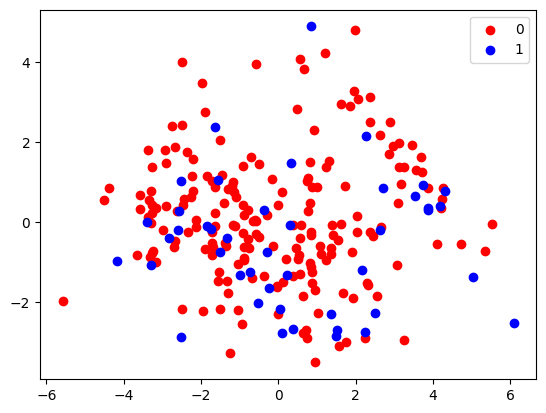

In [ ]:
# Plot the data with different colors for each class
colors = {0: 'red', 1: 'blue'}
fig, ax = plt.subplots()
groups = df_pca.groupby('class')
for name, group in groups:
    ax.scatter(group['PC1'], group['PC2'], c=colors[name], label=name)
ax.legend()
plt.show()

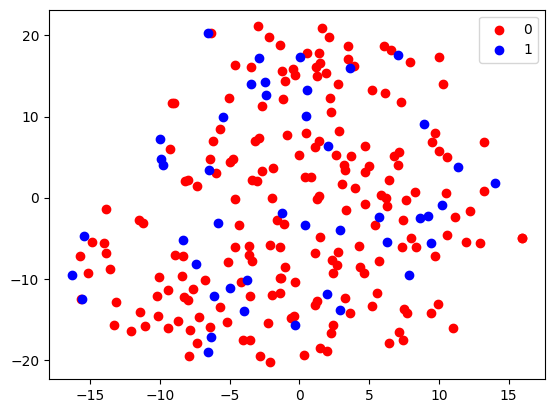

In [ ]:
# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_components = tsne.fit_transform(X)

# Create a new dataframe with the t-SNE components and the class labels
df_tsne = pd.DataFrame(data=tsne_components, columns=['t-SNE1', 't-SNE2'])
df_tsne['class'] = y

# Plot the data with different colors for each class
colors = {0: 'red', 1: 'blue'}
fig, ax = plt.subplots()
groups = df_tsne.groupby('class')
for name, group in groups:
    ax.scatter(group['t-SNE1'], group['t-SNE2'], c=colors[name], label=name)
ax.legend()
plt.show()

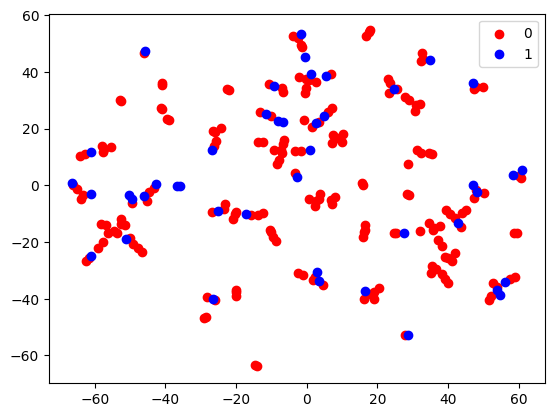

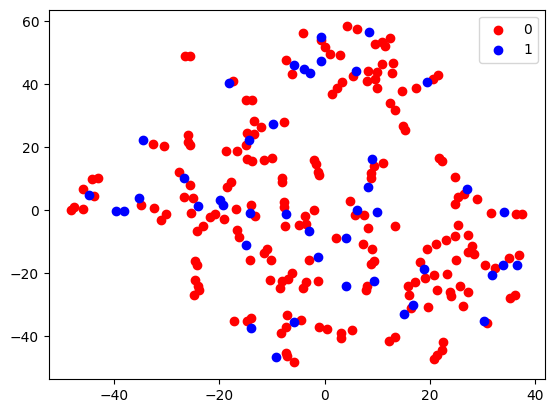

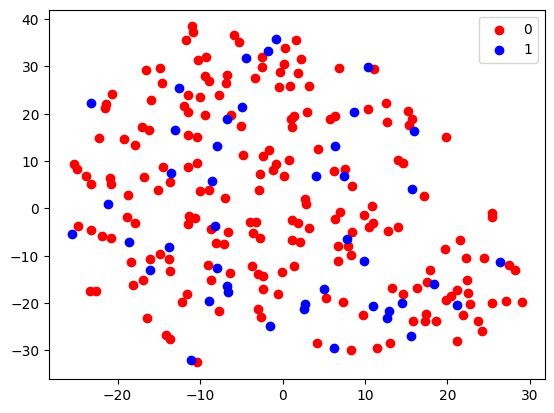

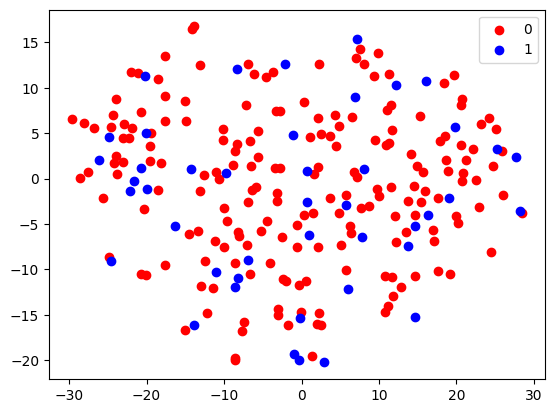

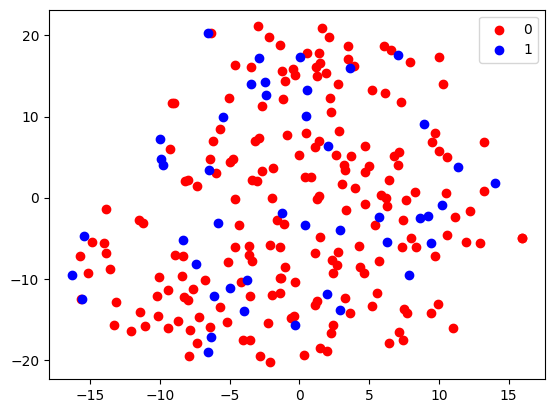

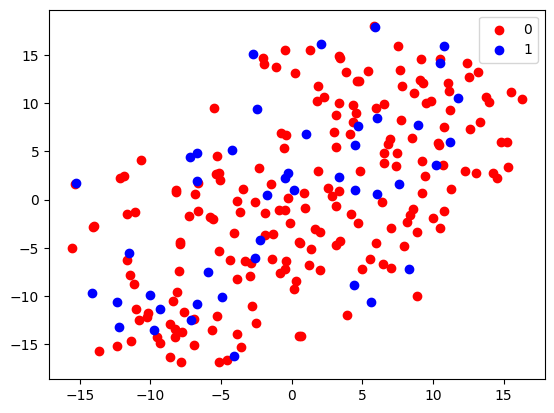

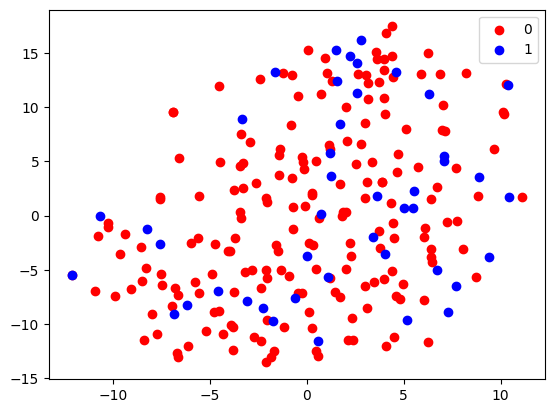

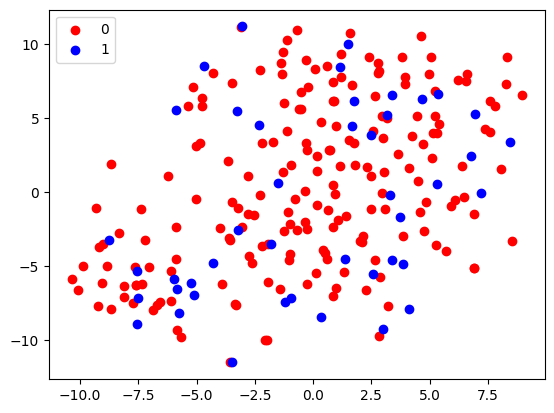

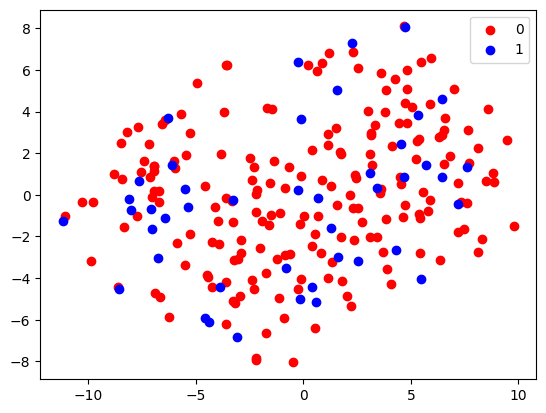

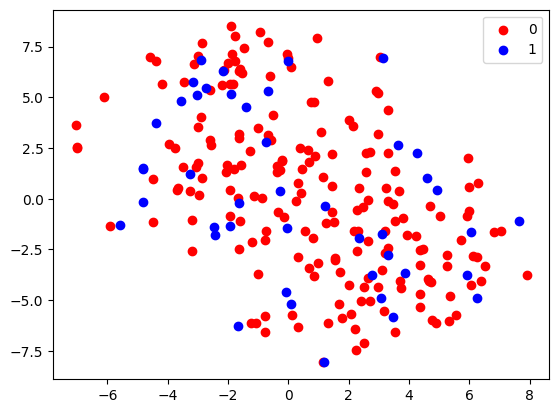

In [ ]:
perp_vals = [2, 5, 10, 15, 20, 22, 27, 34, 40, 45]

for perp in perp_vals:
  # Perform t-SNE
  tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
  tsne_components = tsne.fit_transform(X)

  # Create a new dataframe with the t-SNE components and the class labels
  df_tsne = pd.DataFrame(data=tsne_components, columns=['t-SNE1', 't-SNE2'])
  df_tsne['class'] = y

  # Plot the data with different colors for each class
  colors = {0: 'red', 1: 'blue'}
  fig, ax = plt.subplots()
  groups = df_tsne.groupby('class')
  for name, group in groups:
      ax.scatter(group['t-SNE1'], group['t-SNE2'], c=colors[name], label=name)
  ax.legend()
  plt.show()

In [ ]:
from sklearn.manifold import MDS
import seaborn as sns

Text(0.5, 1.0, 'MDS of Music dataset')

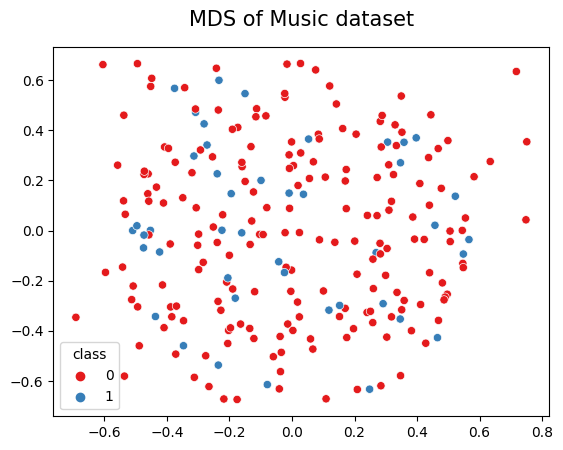

In [ ]:
mds = MDS(n_components=2, metric=False, random_state=2)
X_mds = mds.fit_transform(X)

sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1], hue=y, palette='Set1')
plt.title("MDS of Music dataset", fontsize=15, pad=15)

Looking at social media data now

In [ ]:
df_reddit = pd.read_csv("/content/soy_sentiments_reddit_1.csv")
df_youtube = pd.read_csv("/content/soy_sentiments_youtube.csv")

In [ ]:
list1 = df_reddit["song"]
list1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list1]
df_reddit["song_key"] = list1

In [ ]:
reddit_df = pd.merge(left=result_df, right=df_reddit, left_on='song_key', right_on='song_key', how='inner')

In [ ]:
reddit_df

,year_x,song_x,artist_x,wasWinner_x,weeks_in_top_25,weeks_in_top_10,weeks_on_chart,peak_position,average_position,danceability,...,surprise,profanity,class,song_key,song,artist,num_comments,avg_sentiment,perc_pos,perc_neg
0,1980,She Believes in Me,Kenny Rogers,no,0.01,-0.03,-0.13,-0.53,-0.55,-1.86,...,2.09,-0.92,0,she believes in me,She Believes in Me,Kenny Rogers,2,0.18,100.00,0.00
1,1980,Chuck E.'s in Love,Rickie Lee Jones,no,-0.09,-0.16,-0.21,-0.55,-0.53,1.38,...,-0.63,-0.83,0,chuck es in love,Chuck E.'s in Love,Rickie Lee Jones,7,0.20,100.00,0.00
2,1980,After the Love Has Gone,Earth Wind & Fire,no,-0.19,-0.03,-0.37,-0.58,-0.58,-1.15,...,-0.97,-0.76,0,after the love has gone,After the Love Has Gone,Earth Wind & Fire,2,0.17,100.00,0.00
3,1980,Minute by Minute,The Doobie Brothers,no,-0.58,-0.95,-0.29,-0.36,-0.25,0.99,...,0.66,-0.86,0,minute by minute,Minute by Minute,The Doobie Brothers,3,0.34,100.00,0.00
4,1982,Endless Love,Diana Ross & Lionel Richie,no,0.01,0.23,-0.37,-0.60,-0.81,-0.74,...,0.39,0.30,0,endless love,Endless Love,Diana Ross & Lionel Richie,3,0.18,100.00,0.00
5,1982,9 to 5,Dolly Parton,no,0.30,0.23,0.68,-0.60,-0.42,-0.26,...,0.12,2.20,0,9 to 5,9 to 5,Dolly Parton,129,0.20,89.92,10.08
6,1983,Eye of the Tiger,Survivor,no,0.40,0.89,0.04,-0.60,-0.77,1.55,...,1.14,-0.74,0,eye of the tiger,Eye of the Tiger,Survivor,3,0.52,100.00,0.00
7,1984,All Night Long (All Night),Lionel Richie,no,-1.07,-0.95,-1.17,-0.11,-0.12,1.05,...,-1.04,-0.86,0,all night long all night,All Night Long (All Night),Lionel Richie,2,0.35,100.00,0.00
8,1986,I Want to Know What Love Is,Foreigner,no,0.20,0.10,0.28,-0.60,-0.53,-0.78,...,-1.17,-0.70,0,i want to know what love is,I Want to Know What Love Is,Foreigner,16,-0.12,62.50,37.50
9,1988,I Still Haven't Found What I'm Looking For,U2,no,0.01,-0.03,-0.04,-0.60,-0.51,-0.19,...,0.73,-0.70,0,i still havent found what im looking for,I Still Haven't Found What I'm Looking For,U2,2,0.18,100.00,0.00


In [ ]:
reddit_df.columns

Index(['year_x', 'song_x', 'artist_x', 'wasWinner_x', 'weeks_in_top_25',
       'weeks_in_top_10', 'weeks_on_chart', 'peak_position',
       'average_position', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'num_words',
       'vocab_diveristy', 'pos_sen', 'neg_sen', 'happy', 'fear', 'anger',
       'sad', 'surprise', 'profanity', 'class', 'song_key', 'song', 'artist',
       'num_comments', 'avg_sentiment', 'perc_pos', 'perc_neg'],
      dtype='object')

In [ ]:
(reddit_df.corr().unstack().sort_values().drop_duplicates())[0:15]

perc_pos          perc_neg          -1.00
instrumentalness  time_signature    -0.83
weeks_on_chart    peak_position     -0.68
average_position  weeks_in_top_25   -0.66
energy            acousticness      -0.64
average_position  weeks_on_chart    -0.64
                  weeks_in_top_10   -0.59
num_words         vocab_diveristy   -0.57
peak_position     weeks_in_top_25   -0.57
weeks_in_top_10   peak_position     -0.48
sad               fear              -0.45
time_signature    peak_position     -0.43
average_position  time_signature    -0.41
danceability      peak_position     -0.39
acousticness      danceability      -0.39
dtype: float64

In [ ]:
(reddit_df.corr().unstack().sort_values().drop_duplicates())[-15:]

neg_sen          profanity          0.42
danceability     weeks_on_chart     0.44
energy           num_words          0.45
num_words        duration_ms        0.46
happy            pos_sen            0.47
loudness         year_x             0.48
danceability     valence            0.54
speechiness      num_words          0.58
weeks_on_chart   weeks_in_top_10    0.68
loudness         energy             0.72
weeks_in_top_25  weeks_on_chart     0.81
weeks_in_top_10  weeks_in_top_25    0.94
peak_position    average_position   0.97
year_x           year_x             1.00
                 class               NaN
dtype: float64

Same thing for youtube now

In [ ]:
list1 = df_youtube["song"]
list1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list1]
df_youtube["song_key"] = list1

In [ ]:
youtube_df = pd.merge(left=result_df, right=df_youtube, left_on='song_key', right_on='song_key', how='inner')

In [ ]:
(youtube_df.corr().unstack().sort_values().drop_duplicates())[0:15]

perc_neg          perc_pos           -1.00
energy            acousticness       -0.72
time_signature    duration_ms        -0.71
weeks_on_chart    average_position   -0.67
time_signature    num_words          -0.65
peak_position     weeks_on_chart     -0.64
weeks_in_top_25   average_position   -0.64
average_position  weeks_in_top_10    -0.59
peak_position     weeks_in_top_25    -0.55
year_x            perc_neg           -0.54
loudness          acousticness       -0.54
surprise          fear               -0.52
neg_sen           perc_pos           -0.49
vocab_diveristy   valence            -0.49
weeks_in_top_10   peak_position      -0.48
dtype: float64

In [ ]:
(youtube_df.corr().unstack().sort_values().drop_duplicates())[-15:]

num_comments      weeks_in_top_10   0.50
perc_pos          year_x            0.54
weeks_in_top_10   danceability      0.56
danceability      weeks_on_chart    0.59
                  weeks_in_top_25   0.59
avg_sentiment     peak_position     0.62
average_position  avg_sentiment     0.63
energy            loudness          0.67
duration_ms       num_words         0.74
weeks_in_top_10   weeks_on_chart    0.77
weeks_on_chart    weeks_in_top_25   0.89
weeks_in_top_25   weeks_in_top_10   0.94
average_position  peak_position     0.98
year_x            year_x            1.00
                  class              NaN
dtype: float64

In [ ]:
# Create a logistic regression object
clf = RandomForestClassifier()
# Create an RFE object with 5 features to select
rfe = RFE(clf, n_features_to_select=18)

# Fit the RFE object to the data
rfe.fit(X_train, y_train)

# Print the selected features
print("Selected Features: ", X_train.columns[rfe.support_])

# Transform the data to only include the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train a new logistic regression model on the selected features
clf_selected = RandomForestClassifier()
clf_selected.fit(X_train_selected, y_train)

Selected Features:  Index(['weeks_in_top_25', 'average_position', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'liveness', 'tempo',
       'duration_ms', 'num_words', 'vocab_diveristy', 'neg_sen', 'fear',
       'anger', 'sad', 'surprise', 'profanity'],
      dtype='object')


RandomForestClassifier()

In [ ]:
X_2021 = rfe.transform(df_2021[feature_list])
y_2021 = df_2021["class"]

X_2022 = rfe.transform(df_2022[feature_list])
y_2022 = df_2022["class"]

X_2023 = rfe.transform(df_2023[feature_list])
y_2023 = df_2023["class"]

In [ ]:
proba = clf_selected.predict_proba(X_2021)
proba_win = proba[:, 1]
top_3_ind = np.argpartition(proba_win, -3)[-3:]

print("Top 3 predictions:")
for ind in top_3_ind:
    print(df_2021.iloc[ind]["song_x"])
print("")
print("Actual winner: ")
temp = df_2021.loc[df_2021['wasWinner_x'] == 'yes']
print(temp.iloc[0]["song_x"])

Top 3 predictions:
The Box
Don't Start Now
Circles

Actual winner: 
I Can't Breathe


In [ ]:
proba = clf_selected.predict_proba(X_2022)
proba_win = proba[:, 1]
top_3_ind = np.argpartition(proba_win, -3)[-3:]

print("Top 3 predictions:")
for ind in top_3_ind:
    print(df_2022.iloc[ind]["song_x"])
print("")
print("Actual winner: ")
temp = df_2022.loc[df_2022['wasWinner_x'] == 'yes']
print(temp.iloc[0]["song_x"])

Top 3 predictions:
Right on Time
Kiss Me More
Bad Habits

Actual winner: 
Leave the Door Open


In [ ]:
proba = clf_selected.predict_proba(X_2023)
proba_win = proba[:, 1]
top_3_ind = np.argpartition(proba_win, -3)[-3:]

print("Top 3 predictions:")
for ind in top_3_ind:
    print(df_2023.iloc[ind]["song_x"])
print("")
print("Actual winner: ")
temp = df_2023.loc[df_2023['wasWinner_x'] == 'yes']
print(temp.iloc[0]["song_x"])

Top 3 predictions:
Just Like That
As It Was
Easy on Me

Actual winner: 
Just Like That


Adding search trends

In [ ]:
result_df.columns

Index(['year_x', 'song_x', 'artist_x', 'wasWinner_x', 'weeks_in_top_25',
       'weeks_in_top_10', 'weeks_on_chart', 'peak_position',
       'average_position', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'num_words',
       'vocab_diveristy', 'pos_sen', 'neg_sen', 'happy', 'fear', 'anger',
       'sad', 'surprise', 'profanity', 'class', 'song_key'],
      dtype='object')

In [ ]:
df_trends = pd.read_csv("/content/song_oy_search_trends.csv").drop(columns=["Unnamed: 0"])

In [ ]:
df_trends

,song,year,peak pop,avg pop
0,Daughters,2005,100.00,44.33
1,If I Aint Got You,2005,15.00,6.87
2,Jesus Walks,2005,24.00,7.92
3,Live Like You Were Dying,2005,21.00,7.46
4,The Reason,2005,84.00,52.77
...,...,...,...,...
109,Bad Habit,2023,4.00,1.87
110,Break My Soul,2023,25.00,1.82
111,Easy on Me,2023,100.00,16.31
112,God Did,2023,23.00,10.67


In [ ]:
list1 = list(result_df["song_x"])
list2 = list(df_trends["song"])

In [ ]:
key1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list1]
key2 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list2]

In [ ]:
df_trends["song_key"] = key2
result_df["song_key"] = key1

In [ ]:
# Merge the dataframes on the common column 'song_key'
combined_df = pd.merge(df_trends, result_df, on='song_key', how='inner')

In [ ]:
combined_df.to_csv("temp2.csv")

In [ ]:
len(combined_df)

110

In [ ]:
combined_df.columns

Index(['song', 'year', 'peak pop', 'avg pop', 'song_key', 'year_x', 'song_x',
       'artist_x', 'wasWinner_x', 'weeks_in_top_25', 'weeks_in_top_10',
       'weeks_on_chart', 'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy', 'pos_sen', 'neg_sen',
       'happy', 'fear', 'anger', 'sad', 'surprise', 'profanity', 'class'],
      dtype='object')

In [ ]:
feature_list = ['peak pop', 'avg pop', 'weeks_in_top_25',
       'weeks_in_top_10', 'weeks_on_chart', 'peak_position',
       'average_position', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'num_words',
       'vocab_diveristy', 'pos_sen', 'neg_sen', 'happy', 'fear', 'anger',
       'sad', 'surprise', 'profanity']

In [ ]:
feature_variance = {}
for feature in feature_list:
    values = np.array(combined_df[feature])
    x_norm = (values-np.min(values))/(np.max(values)-np.min(values))
    var = np.var(x_norm)
    #print("Variance for", feature, "=", var)
    feature_variance[feature] = var

In [ ]:
sorted_variance = sorted(feature_variance.items(), key=lambda x:x[1])
features_sorted = []
for ele in sorted_variance:
  print(ele)
  features_sorted.append(ele[0])

('instrumentalness', 0.011128323731152122)
('num_words', 0.012186563646751348)
('time_signature', 0.014028925619834707)
('duration_ms', 0.015219043134831314)
('neg_sen', 0.02375515453998954)
('anger', 0.024245959460120294)
('vocab_diveristy', 0.02695800597487249)
('surprise', 0.033548047750229563)
('liveness', 0.03436855633025397)
('sad', 0.03475059864135808)
('pos_sen', 0.03505815099496288)
('happy', 0.03826340652354639)
('fear', 0.0392571188709223)
('speechiness', 0.04097561085874819)
('avg pop', 0.04381713823182951)
('danceability', 0.04519958208738931)
('loudness', 0.04841048841075136)
('energy', 0.05099479824903571)
('weeks_in_top_25', 0.05303440240784491)
('valence', 0.05363695404163613)
('tempo', 0.05606446583017115)
('weeks_in_top_10', 0.06572824201612079)
('weeks_on_chart', 0.07023613591496046)
('key', 0.08962229355918312)
('profanity', 0.09134216778656196)
('acousticness', 0.09820960464049845)
('average_position', 0.0993745518747673)
('peak_position', 0.12173363123766669)
('p

In [ ]:
feature_subset = features_sorted[-10:]

In [ ]:
X = combined_df[feature_subset]
y = combined_df["class"]

In [ ]:
# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler object to the data
scaler.fit(X)

# Transform the data using the scaler object
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.09,random_state=42)

In [ ]:
X_test

,tempo,weeks_in_top_10,weeks_on_chart,key,profanity,acousticness,average_position,peak_position,peak pop,mode
78,0.60,1.64,0.30,0.68,0.99,-0.05,-0.93,-0.60,-0.40,0.57
10,-1.03,-0.96,-0.05,0.38,0.82,-0.69,0.47,-0.17,0.63,0.57
4,-1.06,0.56,0.59,-0.23,-1.25,-1.09,-0.68,-0.58,1.11,0.57
84,-0.20,-0.74,-0.12,-1.14,-1.36,1.35,-0.25,-0.54,1.53,0.57
64,0.12,0.66,1.02,1.60,-0.46,-0.18,-0.55,-0.58,-0.88,0.57
68,-0.06,-0.96,0.59,0.99,-0.66,0.19,-0.46,-0.40,-0.56,0.57
30,-0.26,0.77,2.23,-0.23,-0.90,-0.83,-0.64,-0.58,-0.90,0.57
45,-0.52,0.66,0.73,0.38,-1.20,-0.57,-0.63,-0.60,1.14,0.57
96,0.88,0.77,0.52,1.60,1.38,1.40,-0.75,-0.60,1.53,0.57
11,0.97,0.56,0.87,-0.83,0.57,-0.89,-0.58,-0.56,1.53,-1.75


In [ ]:
y_test

78    1
10    1
4     0
84    0
64    0
68    0
30    1
45    0
96    0
11    0
Name: class, dtype: int64

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 28.00it/s]


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                0.80               0.86     0.86      0.81   
AdaBoostClassifier                 0.80               0.67     0.67      0.76   
KNeighborsClassifier               0.80               0.67     0.67      0.76   
QuadraticDiscriminantAnalysis      0.80               0.67     0.67      0.76   
NearestCentroid                    0.50               0.55     0.55      0.52   
DecisionTreeClassifier             0.60               0.52     0.52      0.60   
BaggingClassifier                  0.70               0.50     0.50      0.58   
XGBClassifier                      0.70               0.50     0.50      0.58   
SVC                                0.70               0.50     0.50      0.58   
RidgeClassifierCV                  0.70               0.50     0.50      0.58   
RidgeClassifier             

In [ ]:
# Select only the numeric columns for scaling
num_cols = combined_df.select_dtypes(include=['float', 'int']).drop(columns=['year_x', 'year', 'class']).columns

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler object to the numeric data
scaler.fit(combined_df[num_cols])

# Transform the numeric data using the scaler object
combined_df[num_cols] = scaler.transform(combined_df[num_cols])

In [ ]:
combined_df

,song,year,peak pop,avg pop,song_key,year_x,song_x,artist_x,wasWinner_x,weeks_in_top_25,...,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity,class
0,Daughters,-1.77,1.53,1.66,daughters,2005,Daughters,John Mayer,yes,-1.09,...,1.29,1.49,-1.22,0.20,-1.06,0.39,-0.32,1.02,-0.19,1
1,If I Aint Got You,-1.77,-0.72,-0.50,if i aint got you,2005,If I Ain't Got You,Alicia Keys,no,1.12,...,0.14,0.60,-1.11,-0.19,0.15,-0.10,0.21,-0.14,-0.37,0
2,Jesus Walks,-1.77,-0.48,-0.44,jesus walks,2005,Jesus Walks,Kanye West,no,0.06,...,0.89,-0.44,1.25,-1.06,1.28,-0.10,-1.11,1.09,1.27,0
3,Live Like You Were Dying,-1.77,-0.56,-0.47,live like you were dying,2005,Live Like You Were Dying,Tim McGraw,no,-1.09,...,0.25,0.13,-0.40,0.05,1.28,0.14,-0.45,-0.94,-1.18,0
4,The Reason,-1.77,1.11,2.15,the reason,2005,The Reason,Hoobastank,no,0.96,...,-0.44,-1.36,-0.36,-0.90,-1.89,-0.47,3.39,-0.73,-1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Lizzo,1.42,0.74,0.03,lizzo,2023,Lizzo,Lizzo,no,-1.09,...,-0.35,0.39,0.30,-0.11,0.37,0.02,-0.25,0.08,1.87,0
106,As It Was,1.42,1.40,1.33,as it was,2023,As It Was,Harry Styles,no,0.96,...,0.70,-1.05,-1.28,-0.27,0.30,-0.23,0.35,-0.29,-0.69,0
107,Bad Habit,1.42,-1.01,-0.79,bad habit,2023,Bad Habit,Steve Lacy,no,-0.27,...,-0.37,0.29,-0.25,-0.66,-0.61,-0.47,0.21,1.24,-0.57,0
108,Easy on Me,1.42,1.53,0.04,easy on me,2023,Easy on Me,Adele,no,1.20,...,1.25,0.46,-0.85,-1.21,1.88,-0.23,0.08,-0.73,-1.22,0


In [ ]:
df_train = combined_df[(combined_df['year_x'] >= 2005) & (combined_df['year_x'] <= 2020)]
df_2021 = combined_df[(combined_df['year_x'] == 2021)]
df_2022 = combined_df[(combined_df['year_x'] == 2022)]
df_2023 = combined_df[(combined_df['year_x'] == 2023)]

In [ ]:
X_train = df_train[feature_subset]
y_train = df_train["class"]


X_2021 = df_2021[feature_subset]
y_2021 = df_2021["class"]

X_2022 = df_2022[feature_subset]
y_2022 = df_2022["class"]

X_2023 = df_2023[feature_subset]
y_2023 = df_2023["class"]

In [ ]:
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
proba = clf.predict_proba(X_2021)
proba_win = proba[:, 1]
top_3_ind = np.argpartition(proba_win, -3)[-3:]

print("Top 3 predictions:")
for ind in top_3_ind:
    print(df_2021.iloc[ind]["song_x"])
print("")
print("Actual winner: ")
temp = df_2021.loc[df_2021['wasWinner_x'] == 'yes']
print(temp.iloc[0]["song_x"])

Top 3 predictions:
Everything I Wanted
Don't Start Now
Circles

Actual winner: 
I Can't Breathe


In [ ]:
proba = clf.predict_proba(X_2022)
proba_win = proba[:, 1]
top_3_ind = np.argpartition(proba_win, -3)[-3:]

print("Top 3 predictions:")
for ind in top_3_ind:
    print(df_2022.iloc[ind]["song_x"])
print("")
print("Actual winner: ")
temp = df_2022.loc[df_2022['wasWinner_x'] == 'yes']
print(temp.iloc[0]["song_x"])

Top 3 predictions:
Bad Habits
Peaches
Kiss Me More

Actual winner: 
Leave the Door Open


In [ ]:
proba = clf.predict_proba(X_2023)
proba_win = proba[:, 1]
top_3_ind = np.argpartition(proba_win, -3)[-3:]

print("Top 3 predictions:")
for ind in top_3_ind:
    print(df_2023.iloc[ind]["song_x"])
print("")
print("Actual winner: ")
temp = df_2023.loc[df_2023['wasWinner_x'] == 'yes']
print(temp.iloc[0]["song_x"])

Top 3 predictions:
Lizzo
Just Like That
As It Was

Actual winner: 
Just Like That


In [ ]:
feature_imps = {}
for i in range(len(feature_subset)):
    feature_imps[feature_subset[i]] = clf.feature_importances_[i]

In [ ]:
feature_imps = sorted(feature_imps.items(), key=lambda x:x[1])
print(feature_imps)

[('mode', 0.03528955605256417), ('peak_position', 0.08085753661553909), ('key', 0.08165456044854552), ('acousticness', 0.09193809638596857), ('tempo', 0.10387207709497095), ('average_position', 0.11344885986984182), ('weeks_on_chart', 0.11581661713949587), ('profanity', 0.11608064501125016), ('peak pop', 0.1287043924416499), ('weeks_in_top_10', 0.13233765894017394)]
